## Importing needed libraries

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read/Load the housing dataset, it will be splitted later for training and testing

In [28]:
housing_dataset = pd.read_csv("Data/housing.csv")

## Let's explor the data to see if any preproccsing needed (Data Exploration Stage)

### Print the dataset, and try to understand the each feature, that will help in the feature engineering stage

In [29]:
housing_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### One thing to check for is if there are any null values

In [30]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### We can see from the Non-Null count that there are null values, and since the number of null values is small it is better to drop them than trying to inject values in them, let's drop them, and update the dataframe

In [31]:
housing_dataset.dropna(inplace = True)

### Check the dataframe again, and verify no null values are exist

In [32]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Split the dataset into training and testing datasets

### Split the Data into features (X) and targets (y)

In [33]:
X = housing_dataset.drop(['median_house_value'], axis = 1)
y = housing_dataset['median_house_value']

### Split the Data into Training dataset and Testing dataset

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Join training X_train with y_train in order to have one dataset that will be used for training

In [35]:
train_data = X_train.join(y_train)

In [36]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2929,-119.00,35.36,40.0,850.0,227.0,764.0,186.0,0.9407,INLAND,43600.0
6321,-117.98,34.00,22.0,3632.0,538.0,1968.0,566.0,6.0190,<1H OCEAN,324900.0
18529,-122.03,36.98,37.0,2817.0,716.0,1341.0,662.0,2.1553,NEAR OCEAN,255400.0
9673,-118.45,37.70,15.0,2199.0,453.0,899.0,347.0,2.3500,INLAND,107800.0
1685,-122.28,37.99,28.0,3801.0,622.0,1654.0,571.0,4.3750,NEAR BAY,193300.0
...,...,...,...,...,...,...,...,...,...,...
3976,-118.62,34.18,25.0,3124.0,468.0,1241.0,439.0,6.4044,<1H OCEAN,333100.0
18098,-122.04,37.33,22.0,4011.0,963.0,2206.0,879.0,4.5721,<1H OCEAN,351200.0
17450,-120.45,34.71,21.0,1868.0,268.0,522.0,255.0,6.4678,NEAR OCEAN,249300.0
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,INLAND,70800.0


### We can see the distribution of the indivails feature by using "hist"

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

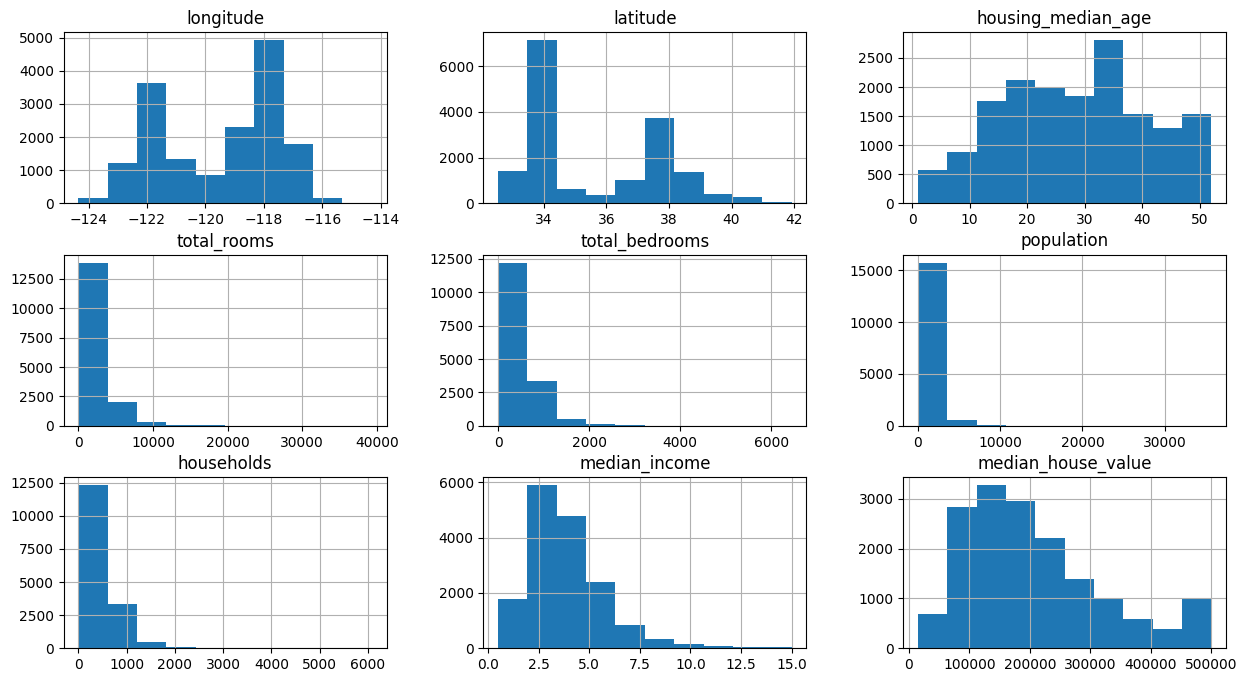

In [37]:
train_data.hist(figsize=(15, 8))

### And to see the coloration between the feature and the target we can use heatmap with the corr()

/var/folders/fx/z0vx620559sc5qz6v_t_xpnw0000gr/T/ipykernel_92919/1811937681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

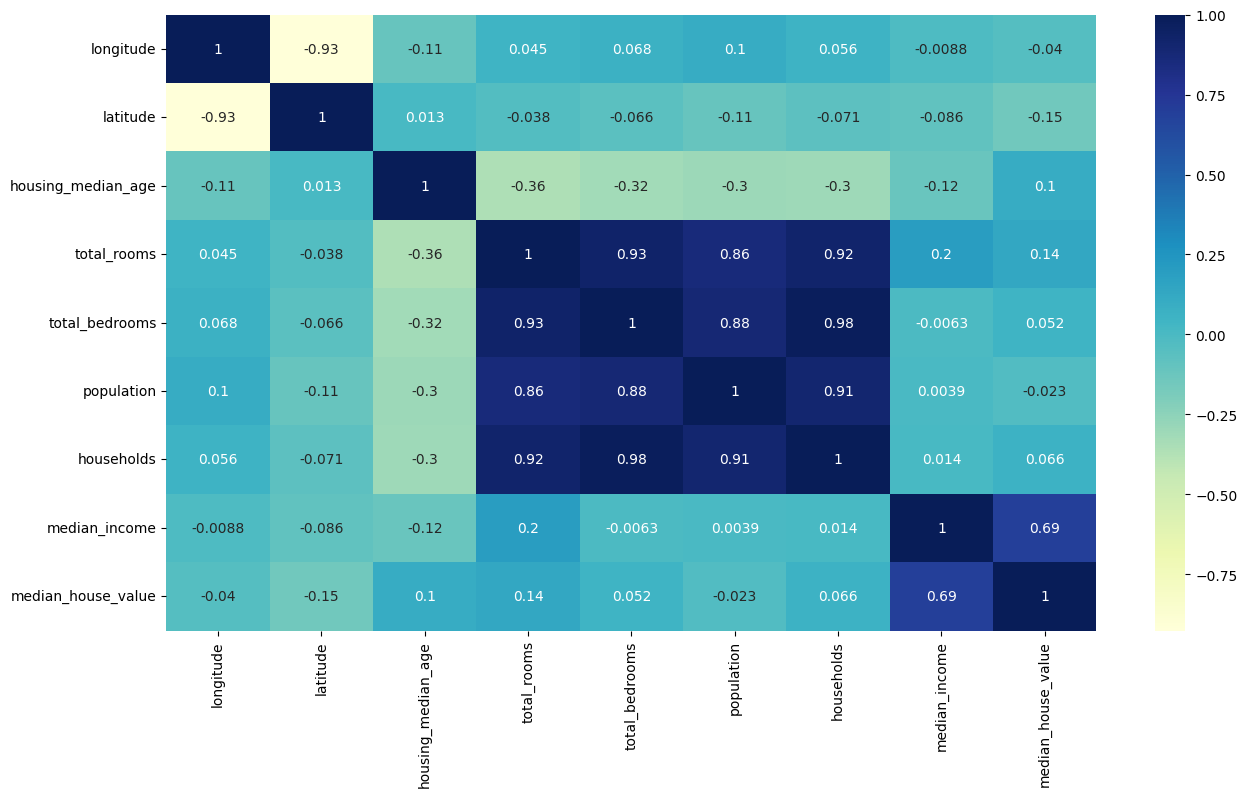

In [38]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Let's Pre-process (Data pre-processing Stage)

### Data is Skewed, let's fix that to have bettwe distribution

In [39]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

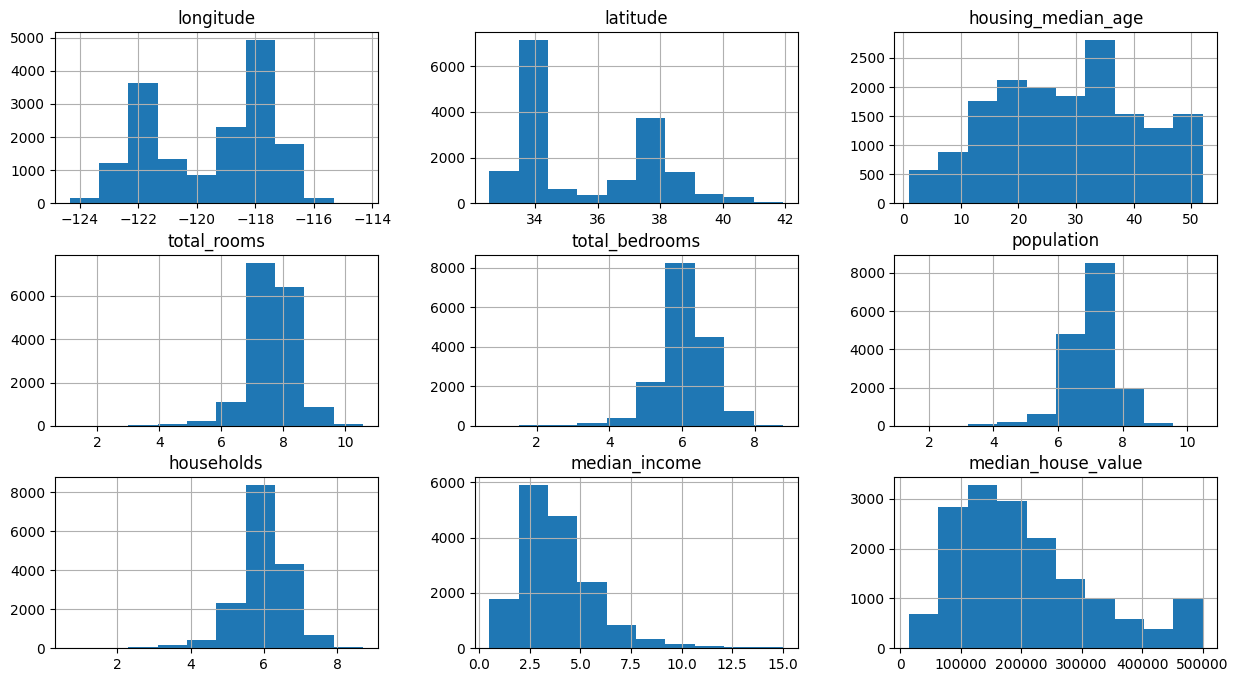

In [40]:
train_data.hist(figsize=(15, 8))

### Let's one hot "code ocean_proximity" feature, so we can split it to multiple features

In [41]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7249
INLAND        5182
NEAR OCEAN    2108
NEAR BAY      1804
ISLAND           3
Name: ocean_proximity, dtype: int64

In [42]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2929,0,1,0,0,0
6321,1,0,0,0,0
18529,0,0,0,0,1
9673,0,1,0,0,0
1685,0,0,0,1,0
...,...,...,...,...,...
3976,1,0,0,0,0
18098,1,0,0,0,0
17450,0,0,0,0,1
20617,0,1,0,0,0


### Add the new features to the training dataset

In [43]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [44]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2929,-119.00,35.36,40.0,6.746412,5.429346,6.639876,5.231109,0.9407,43600.0,0,1,0,0,0
6321,-117.98,34.00,22.0,8.197814,6.289716,7.585281,6.340359,6.0190,324900.0,1,0,0,0,0
18529,-122.03,36.98,37.0,7.943783,6.575076,7.201916,6.496775,2.1553,255400.0,0,0,0,0,1
9673,-118.45,37.70,15.0,7.696213,6.118097,6.802395,5.852202,2.3500,107800.0,0,1,0,0,0
1685,-122.28,37.99,28.0,8.243283,6.434547,7.411556,6.349139,4.3750,193300.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,-118.62,34.18,25.0,8.047190,6.150603,7.124478,6.086775,6.4044,333100.0,1,0,0,0,0
18098,-122.04,37.33,22.0,8.297045,6.871091,7.699389,6.779922,4.5721,351200.0,1,0,0,0,0
17450,-120.45,34.71,21.0,7.533159,5.594711,6.259581,5.545177,6.4678,249300.0,0,0,0,0,1
20617,-121.53,39.06,20.0,6.331502,4.700480,5.733341,4.744932,3.3021,70800.0,0,1,0,0,0


### Let's see how the new feature collorate to the target 

<AxesSubplot: >

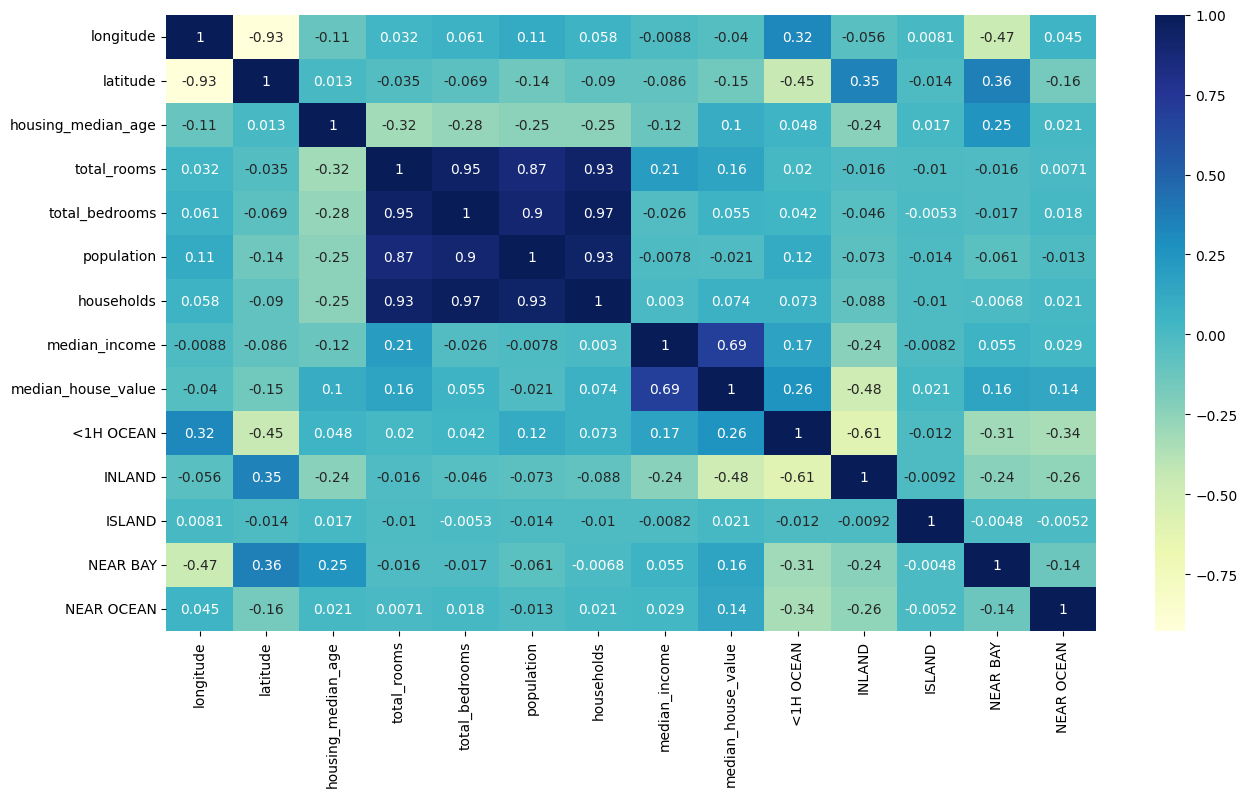

In [45]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

### Let's try to explor the effect of the location on the price, as following

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

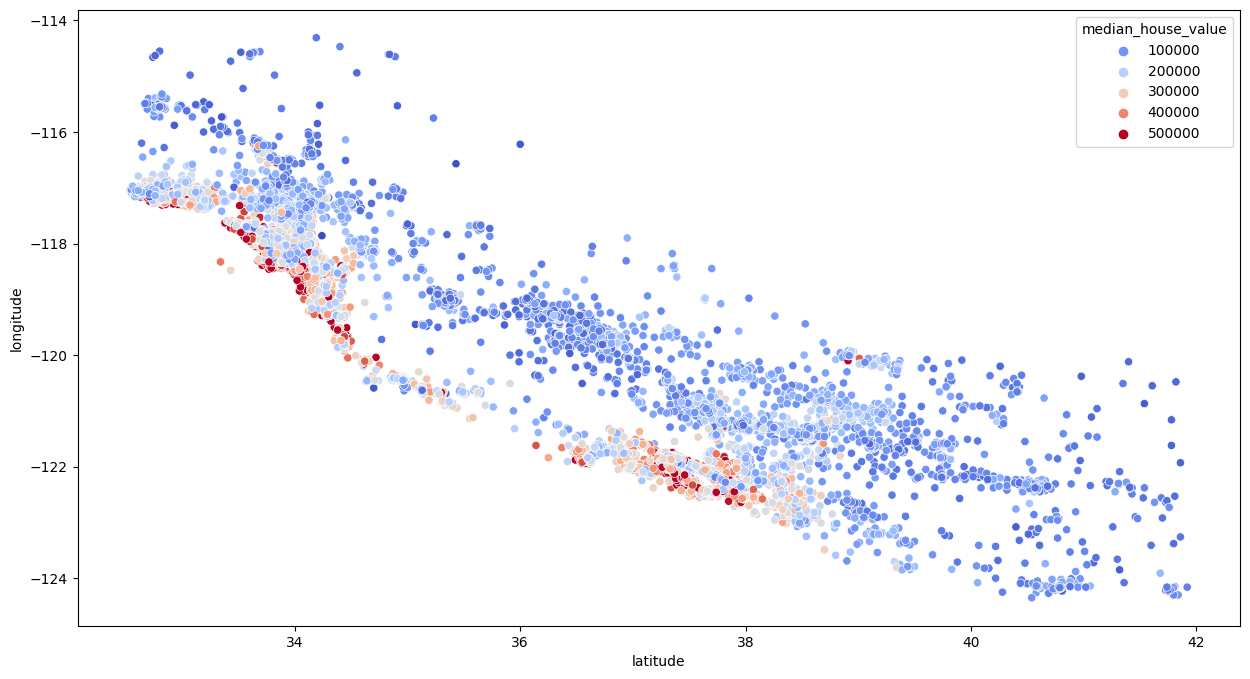

In [46]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

### We can generate new features as following: 

In [47]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot: >

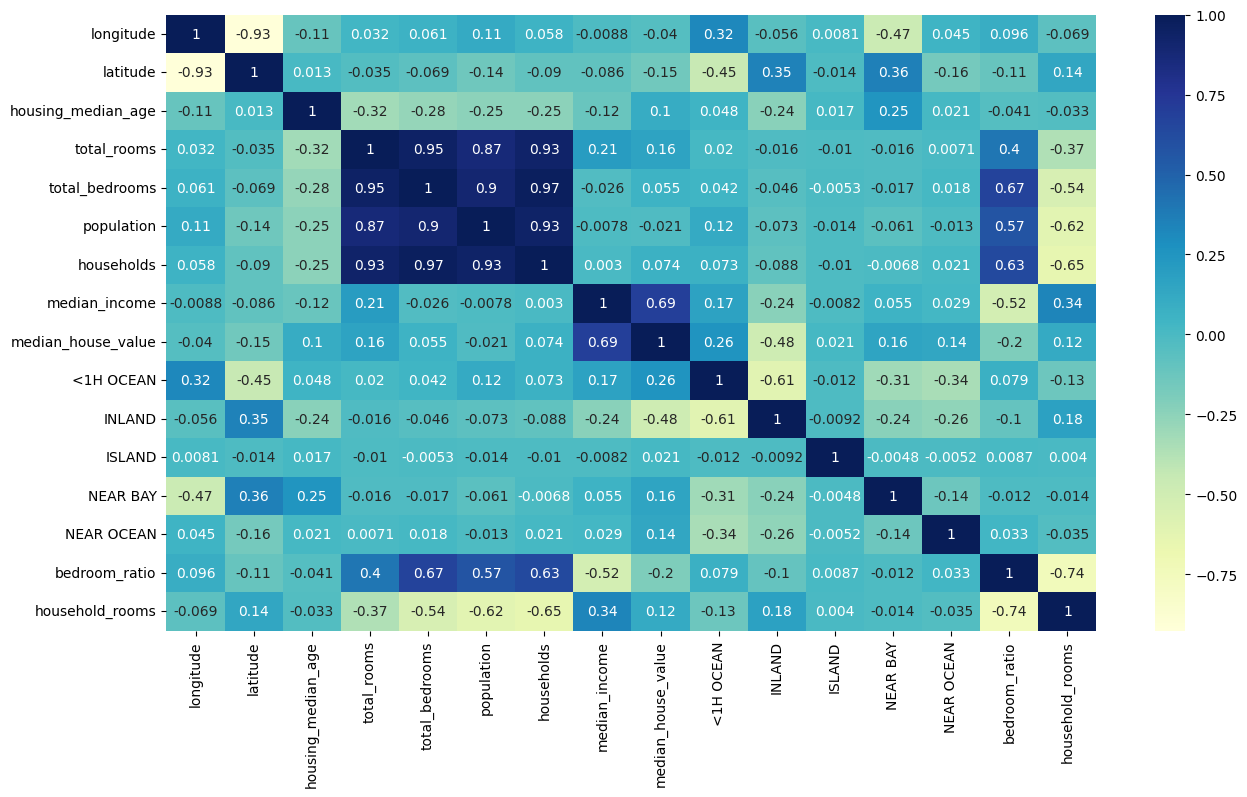

In [48]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Now we are going to Train a LR model (Training Stage)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

### Scalling testing data same as we did for training. (To be refactored by making a funtion to do the scalling)

In [50]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [51]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [52]:
X_test_s = scaler.transform(X_test)

In [53]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2929,-119.00,35.36,40.0,6.746412,5.429346,6.639876,5.231109,0.9407,43600.0,0,1,0,0,0,0.804775,1.289672
6321,-117.98,34.00,22.0,8.197814,6.289716,7.585281,6.340359,6.0190,324900.0,1,0,0,0,0,0.767243,1.292957
18529,-122.03,36.98,37.0,7.943783,6.575076,7.201916,6.496775,2.1553,255400.0,0,0,0,0,1,0.827701,1.222727
9673,-118.45,37.70,15.0,7.696213,6.118097,6.802395,5.852202,2.3500,107800.0,0,1,0,0,0,0.794949,1.315097
1685,-122.28,37.99,28.0,8.243283,6.434547,7.411556,6.349139,4.3750,193300.0,0,0,0,1,0,0.780581,1.298331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,-118.62,34.18,25.0,8.047190,6.150603,7.124478,6.086775,6.4044,333100.0,1,0,0,0,0,0.764317,1.322078
18098,-122.04,37.33,22.0,8.297045,6.871091,7.699389,6.779922,4.5721,351200.0,1,0,0,0,0,0.828137,1.223767
17450,-120.45,34.71,21.0,7.533159,5.594711,6.259581,5.545177,6.4678,249300.0,0,0,0,0,1,0.742678,1.358506
20617,-121.53,39.06,20.0,6.331502,4.700480,5.733341,4.744932,3.3021,70800.0,0,1,0,0,0,0.742396,1.334371


In [54]:
reg.score(X_test, y_test)

0.655519008221902

## Try to train the model using RandomForestRegressor (The Random Forest algorithm builds a collection of decision trees and combines their predictions to make a final prediction. It helps reduce overfitting and improves accuracy)

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
forest.score(X_test, y_test)

0.8109293479493398

In [57]:
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [58]:
forest.score(X_test_s, y_test)

0.8100695503543092

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [8, 12, 20],
    "min_samples_split": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring="neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_s, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)